## Machine Learning and Statistics Assessment 2019 - Lucia Saura

# Boston Data Set Analysis

## 1. Research and Introduction

The Boston housing data set represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts in 506 entries. It was collected in 1978 and presents the Median home values of Boston with associated home and neighbourhood attributes.

The data was originally published by Harrison, D. and Rubinfeld, D.L. for discovering the influence of air pollution using nitrous oxide as a variable to find whether the air is clean or not in Boston "Hedonic prices and the demand for clean air", J. Environ. Economics & Management, vol.5, 81-102, 1978.


Trough this project the data set will be analysed from different angles to make predictions using machine learning trough the technology tools described below.

*Soruces:*

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html


### Technology/packages description

**Scipy**

SciPy is a Python-based ecosystem of open-source software for mathematics, science, and engineering. In particular, these are some of the core packages:

- NumPy

- SciPy library. Fundamental library for scientific computing

- Matplotlib. Comprehensive 2-D plotting

- IPython. Enhanced interactive console

- SymPy. Symbolic mathematics

- Pandas. Data structures & analysis

*Source:* https://www.scipy.org/


**Numpy**

Numpy is an open source library written in C++, it is the fundamental package for scientific computing with Python.
It adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.


It contains among other things:

- a powerful N-dimensional array object. NumPy targets the CPython reference implementation of Python, which is a non-optimizing bytecode interpreter. Mathematical algorithms written for this version of Python often run much slower than compiled equivalents. NumPy addresses the slowness problem partly by providing multidimensional arrays and functions and operators that operate efficiently on arrays, requiring rewriting some code, mostly inner loops using NumPy.

- sophisticated (broadcasting) functions. Broadcasting is the name given to the method that NumPy uses to allow array arithmetic between arrays with a different shape or size. Broadcasting solves the problem of arithmetic between arrays of differing shapes by in effect replicating the smaller array along the last mismatched dimension.

- tools for integrating C/C++ and Fortran code; tools such as f2py, Cython or ctypes. 

- useful linear algebra, Fourier transform, and random number capabilities

In early 2005, NumPy developer Travis Oliphant wanted to unify the community around a single array package and ported Numarray's features to Numeric, releasing the result as NumPy 1.0 in 2006. This new project was part of SciPy. To avoid installing the large SciPy package just to get an array object, this new package was separated and called NumPy.

*Sources:*
https://numpy.org/
https://en.wikipedia.org/wiki/NumPy
https://machinelearningmastery.com/broadcasting-with-numpy-arrays/
https://towardsdatascience.com/how-to-understand-numpy-documentation-897d5307609b


**Keras**

Keras is an open source high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. 
"Being able to go from idea to result with the least possible delay is key to doing good research."

Its primary author and maintainer is François Chollet, a Google engineer.

Keras contains numerous implementations of commonly used neural-network building blocks such as layers, objectives, activation functions, optimizers, and a host of tools to make working with image and text data easier to simplify the coding necessary for writing Deep Neural Network code. The code is hosted on GitHub.

Keras allows users to productize deep models on smartphones (iOS and Android), on the web, or on the Java Virtual Machine.


*Sources:*
https://keras.io/
https://en.wikipedia.org/wiki/Keras#



**Tensorflow**

TensorFlow is an end-to-end open source platform for machine learning. It is a symbolic math library and is also used for machine learning applications such as neural networks. It is used for both research and production at Google.

TensorFlow was developed by the Google Brain team for internal Google use. It was released under the Apache License 2.0 on November 9, 2015.


*Sources:* 
https://www.tensorflow.org/
https://en.wikipedia.org/wiki/TensorFlow




### General information about the Boston housing data set

In the cells below the data frame is imported from the scikit-learn library.

The following commands show a description of the general overview of the data set.

It contains 506 rows and 14 columns with the following attribute information:
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    percentage lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [1]:
#Import basic packages
# For numerical arrays.
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn
# For data frames.
import pandas as pd
from pandas.plotting import scatter_matrix as scat
# For neural networks.
import keras as kr
import seaborn as sns 
# For preprocessing data.
import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening
import sklearn.decomposition as dec

%matplotlib inline

Using TensorFlow backend.


In [2]:
#Import Boston data set
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
#Show the description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#Number of rows and columns in the dataset
print(boston.data.shape)

(506, 13)


In [5]:
#Column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
#Converting the dataset to pandas
bostondf = pd.DataFrame(boston.data)
#showing the first column as column names
bostondf.columns = boston.feature_names

#printing the data set
bostondf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [7]:
#Printing the column target (Price)
target = pd.DataFrame(boston.target)
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


## 2.  Descriptive statistics

Descriptive statistics involves summarizing and organizing the data so they can be easily understood. Descriptive statistics, unlike inferential statistics, seeks to describe the data, but do not attempt to make inferences from the sample to the whole population. This generally means that descriptive statistics, unlike inferential statistics, is not developed on the basis of probability theory.

Descriptive statistics are broken down into two categories. Measures of central tendency (mean) and measures of variability or spread (standard deviation).

*Source:
https://towardsdatascience.com/understanding-descriptive-statistics-c9c2b0641291

In [8]:
#printing on screen the mean of each attribute
bostondf.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [9]:
#printing on screen the mean of the target column
price= boston.target
price.mean()

22.532806324110677

In [10]:
#Adding the target column (Price) to be shown in the dataset

bostondf['MEDV'] = boston.target

#printing the first rows of the dataset
print(bostondf.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [11]:
#summary of the boston data set
print(bostondf.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

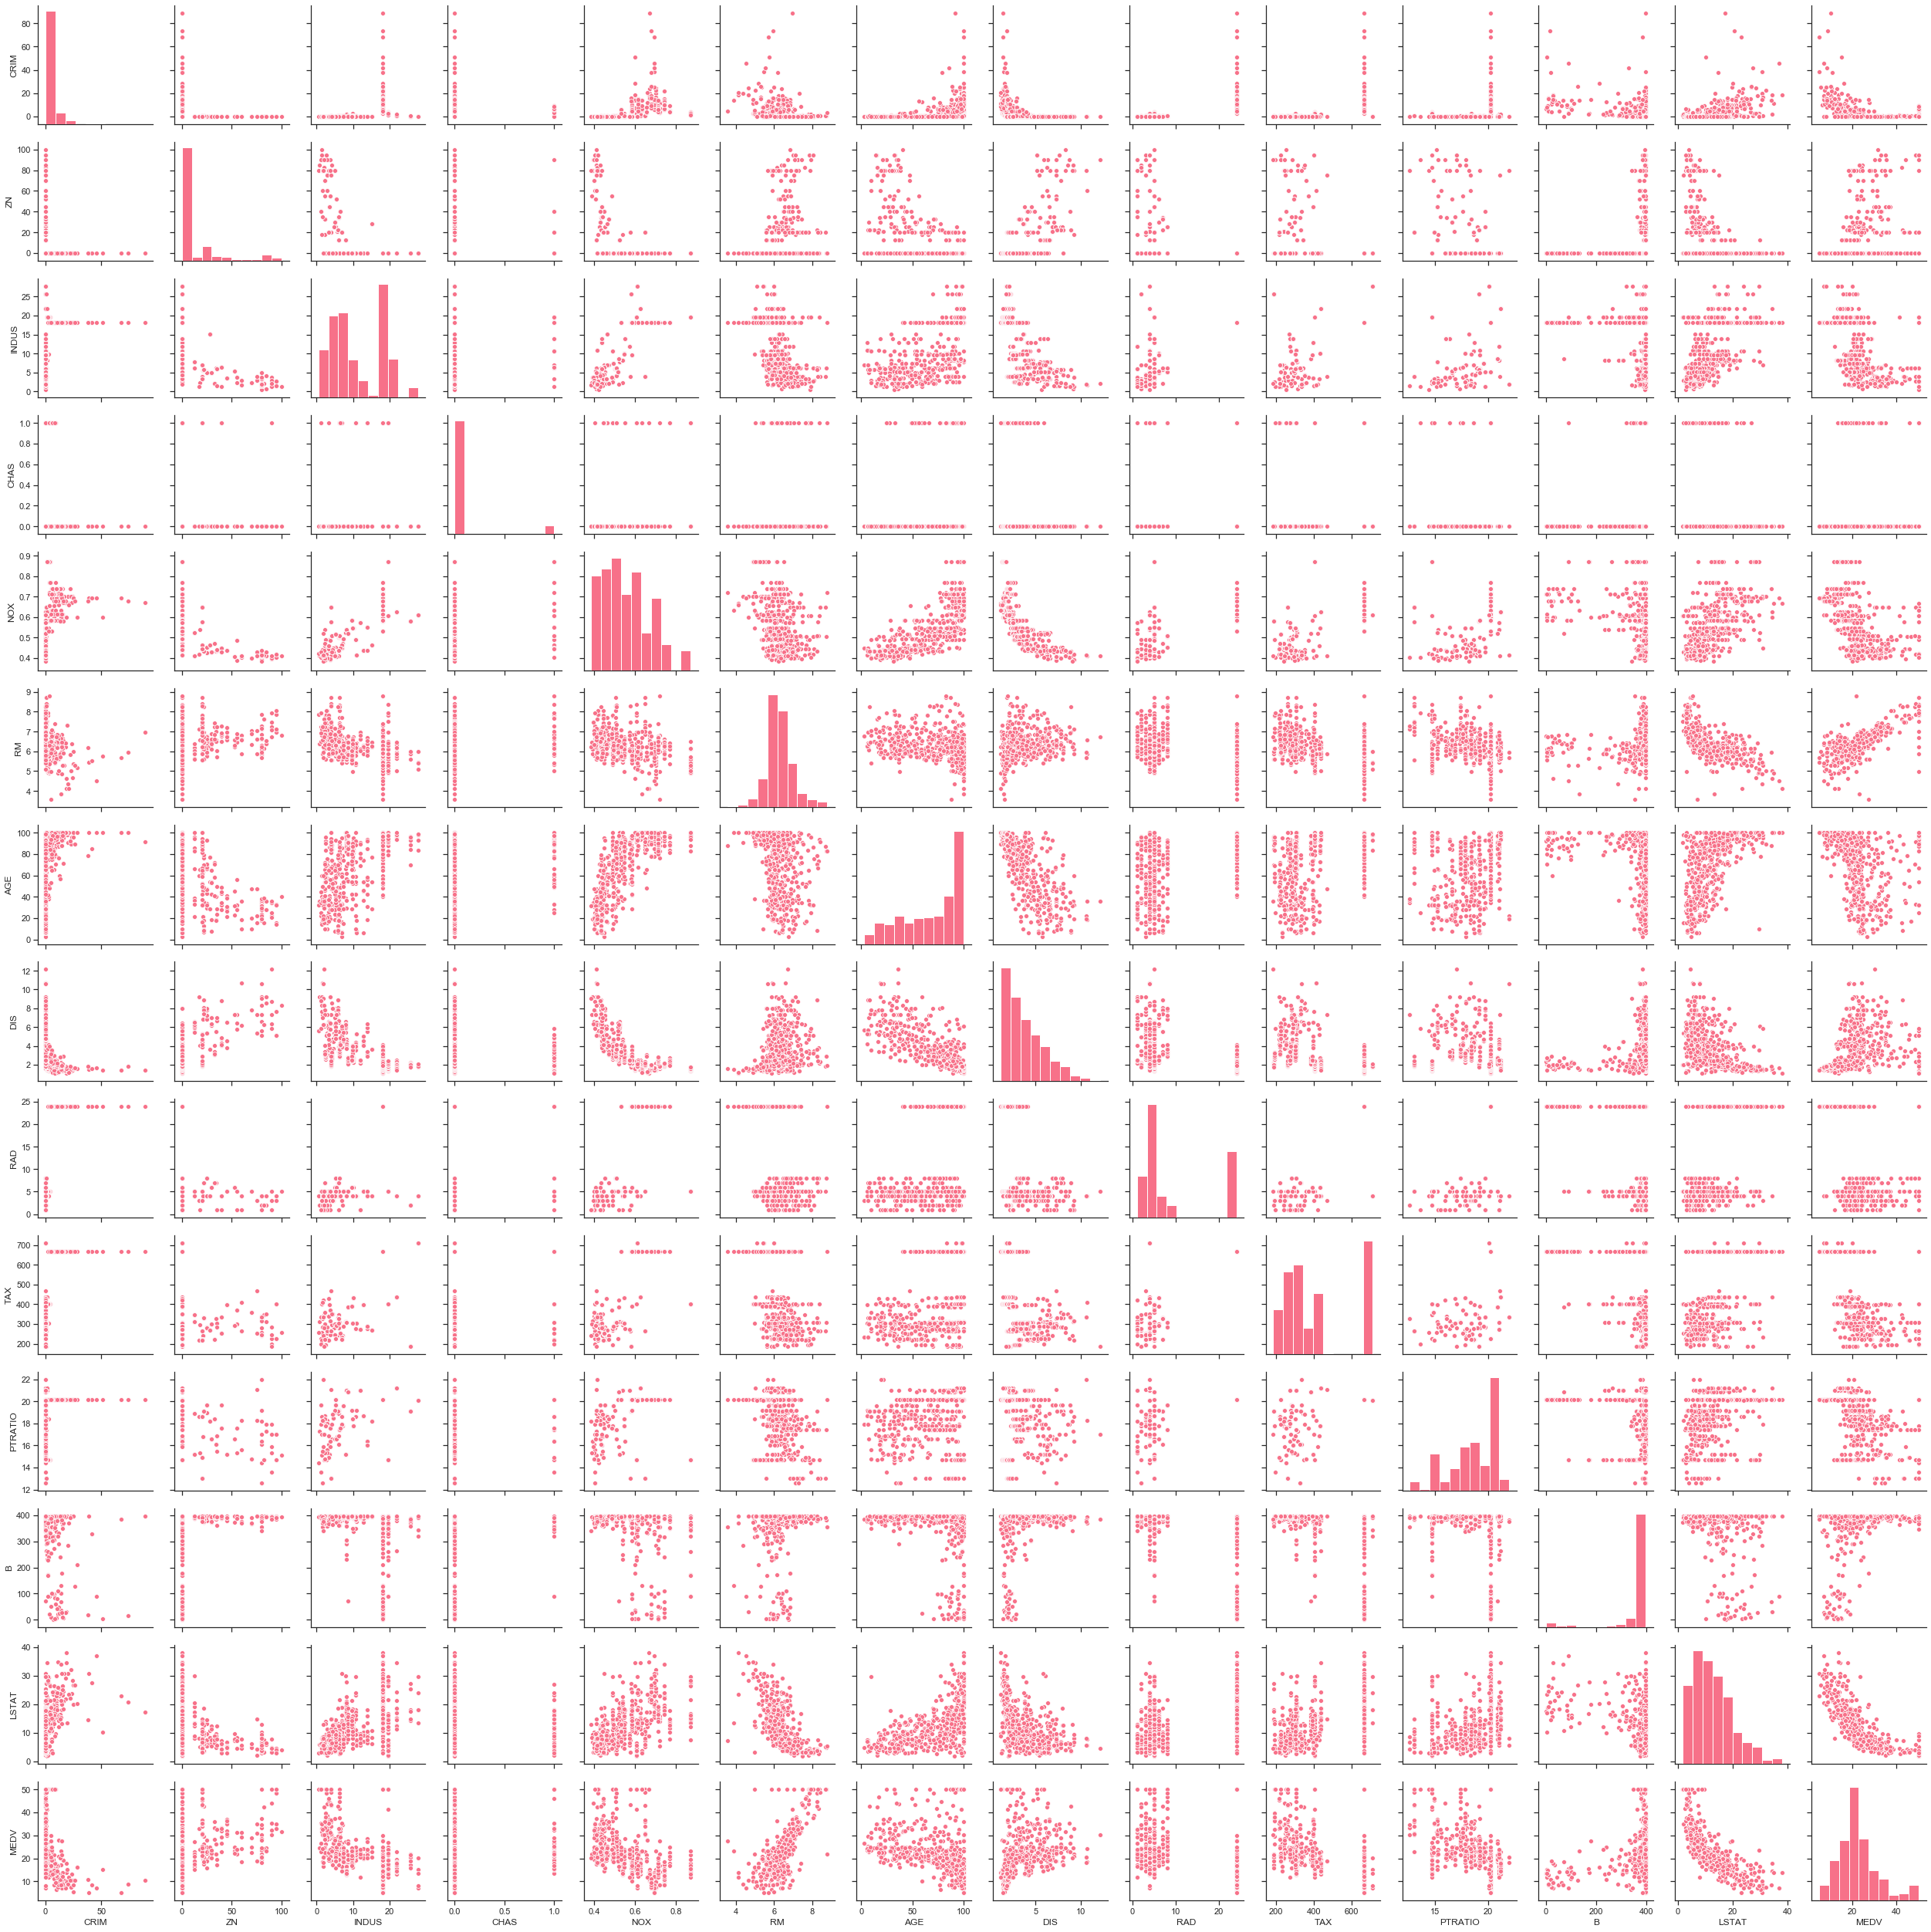

In [12]:
sns.set(style="ticks", palette="husl", color_codes=True)


g = sns.pairplot(bostondf)


import matplotlib.pyplot as plt
plt.show()



In the plot above each attribute presents its distribution and is plotted in correlation with the other attributes in the data set. The bar charts indicate the attribute distribution. It can be appreciated that there are evident distributions such as RM has a Gaussian or normal distribution, DIS has an exponential distribution and other less evident distributions such as LSTAT could be classified as a log normal distribution.

Nevertheless, other attributes such as CRIM, ZN and B are concentrated in one value.

It surprises the mean of the RM exceeding 6 rooms per dwelling quite higher than expected.

The mean of the Age 68.574901 presents some interesting feedback as close to 70% of the houses would have been built prior to 1940. This data shows that the dwellings tend to be old in Boston. Looking closer to the data represented in a plot below a high number of values are under the 100% value making evident that there are areas with mostly all houses being built previous to 1940.

The pupil-teacher ratio mean is around 18 while when looked closer to the data distribution in the plot below a large number of values are concentrated around 20. That amount of pupil-teacher ratio would be considered regular in a USA city.

The mean price for the houses is around 22530$ a price that evidences that the data was collected 41 years ago, today the mean price in a city in the USA would be expected to be higher.

Some variables show also a correlation between them while others don't. That point will be discussed in detail when analysing the correlations in point 3.


*Sources* https://towardsdatascience.com/probability-distributions-in-data-science-cce6e64873a7 

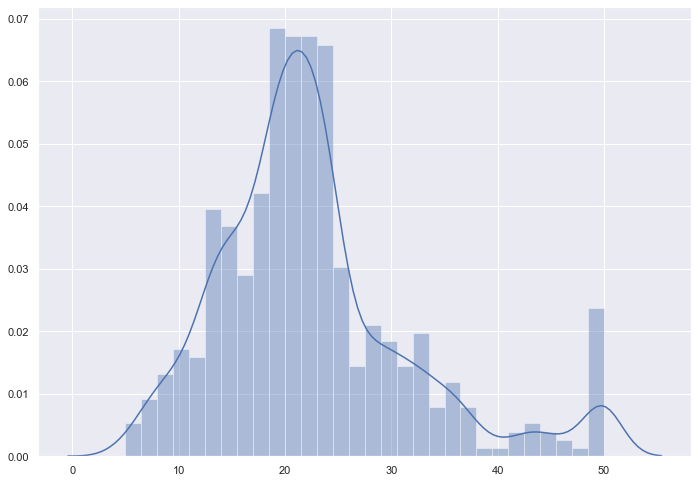

In [12]:
# Using pyplot to plot the prices
boston['MEDV'] = boston.target

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

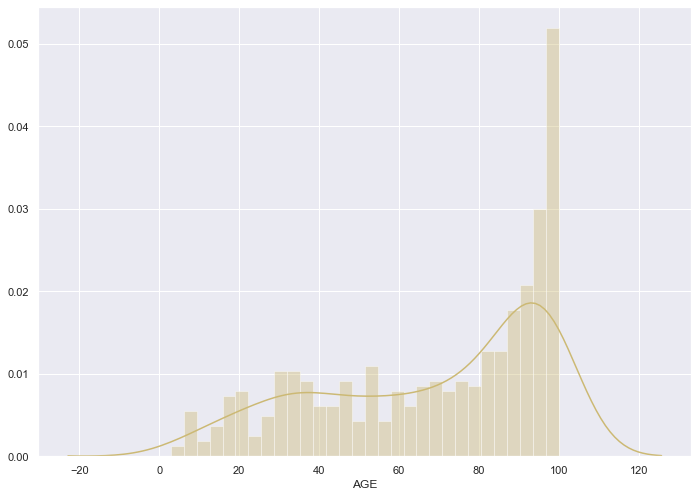

In [13]:
#Getting the info of the houses age
S = bostondf['AGE']


# Using pyplot to plot the distribution of the houses age

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(S, color="y", bins=30)
plt.show()

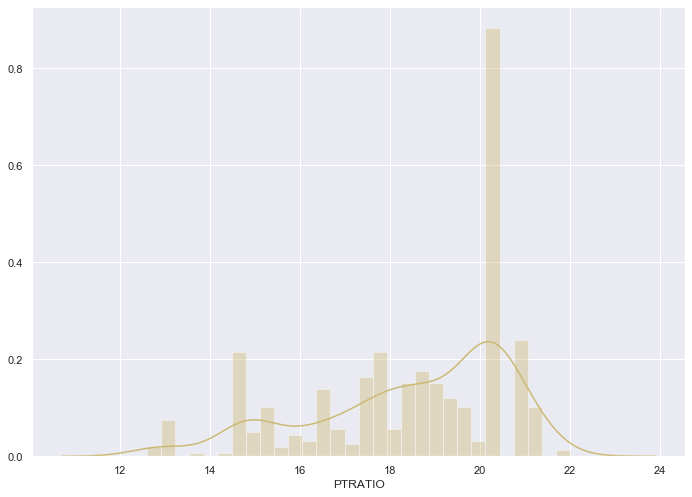

In [14]:
#Getting the info of crime rate
C = bostondf['PTRATIO']


# Using pyplot to plot the distribution of crime rate

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(C, color="y", bins=30)
plt.show()

The following graphs will show the correlations between different variables.
LSTAT and MEDV are negatively correlated so the lower status of the population the lower the price of the house.
RM and MEDV are highly correlated, meaning the more rooms the house has the higher the price.
Nevertheless, there are other variables that don't show those clear correlations when presented graphically such as DIS and PTRATIO.

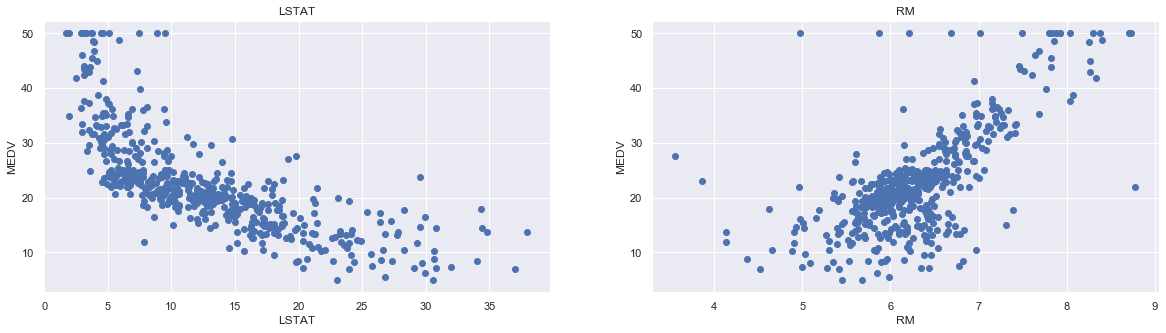

In [15]:
#code adapted from towardsdatascience.com
#ploting LSTAT and MEDV high negative correlation and ploting RM and MEDV strong positive correlation
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bostondf['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostondf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

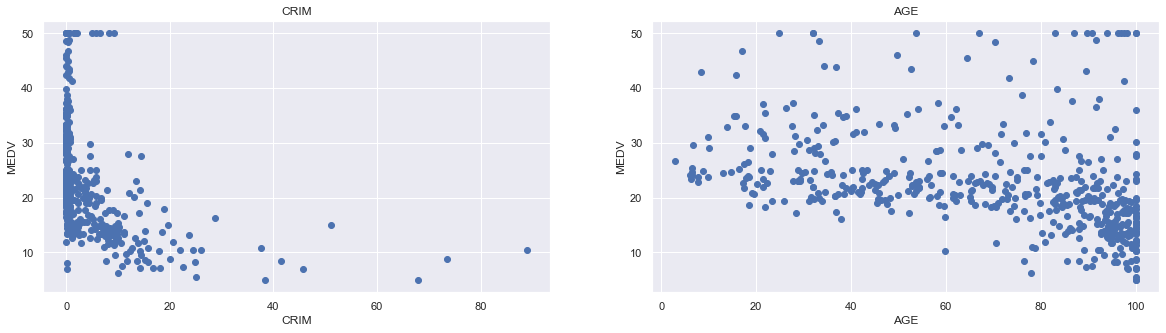

In [16]:
#code adapted from towardsdatascience.com
#ploting Crim and Age correlation with MEDV
plt.figure(figsize=(20, 5))

features = ['CRIM', 'AGE']
target = bostondf['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostondf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

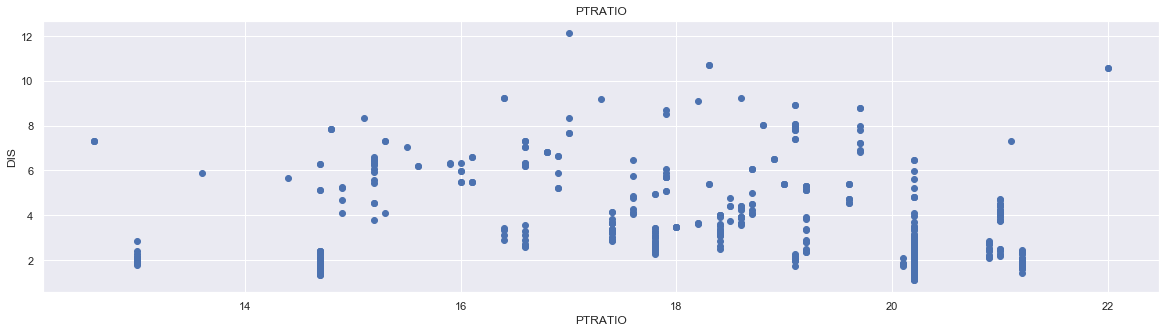

In [17]:
#code adapted from towardsdatascience.com
#ploting Crim and Age correlation with MEDV
plt.figure(figsize=(20, 5))

features = ['PTRATIO']
target = bostondf['DIS']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostondf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('DIS')

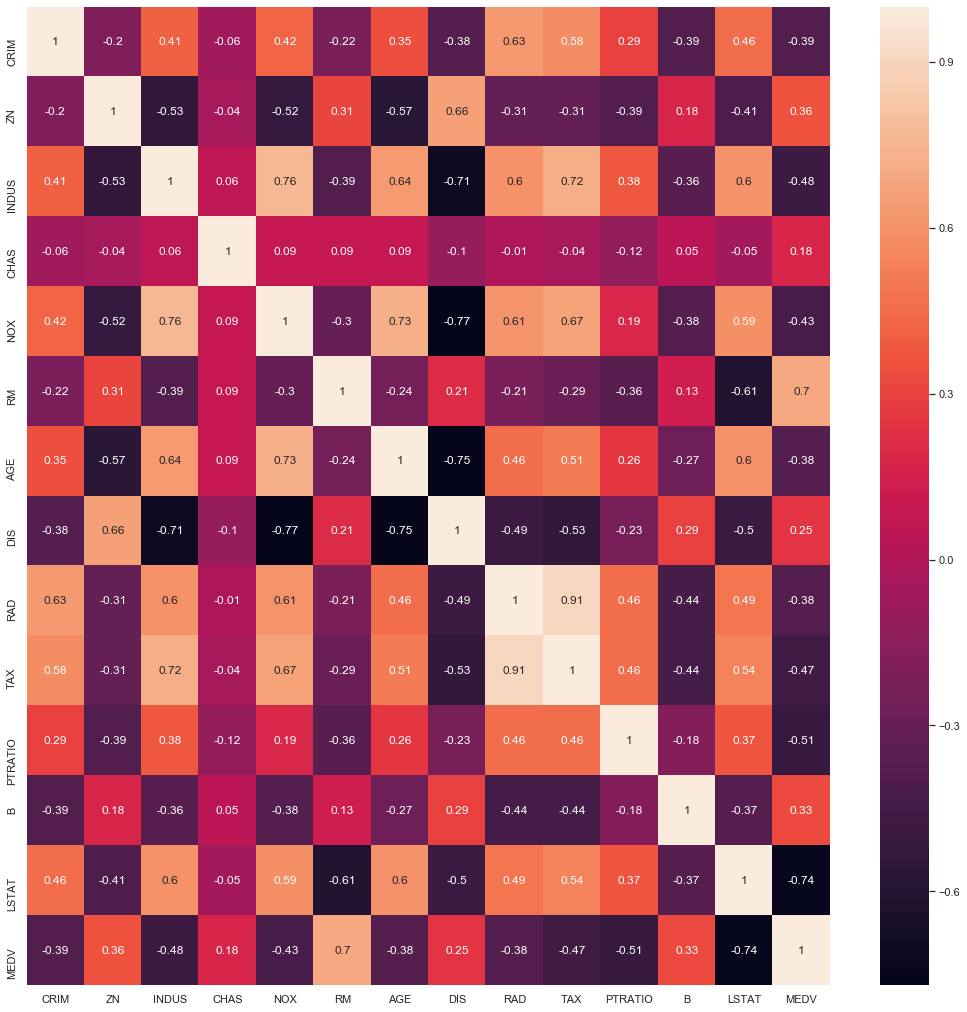

In [18]:
#code adapted from towardsdatascience.com
#show linear correlations between variables
plt.figure(figsize = (18,18))
correlation_matrix = bostondf.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

### Correlations

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

The Boston data set heatmap presents a strong positive correlation between the index of accessibility to radial highways (RAD) and the full-value property-tax rate per $10,000 (TAX). 

Furthermore, there is a positive relationship between nitric oxides concentration (NOX) and proportion of non-retail business acres per town (INDUS).

Exists as well a positive correlation between Median value of owner-occupied homes in $1000's and the average number of rooms per dwelling (RM).

On the other hand, there are strong negative correlations between weighted distances to five Boston employment centres (DIS) and nitric oxides concentration (parts per 10 million) (NOX). 

Also a strong negative correlation between weighted distances to five Boston employment centres (DIS) and the proportion of owner-occupied units built prior to 1940 (AGE). 

Moreover, there is a negative correlation between Median value of owner-occupied homes in $1000's (MEDV) and percentage of the lower status of the population (LSTAT).

It can be appreciated a negative correlation as well between the proportion of non-retail business acres per town (INDUS) and weighted distances to five Boston employment centres (DIS).

## 3. Inferential statistics

Inferential statistics allows you to make predictions (“inferences”) from the data, while descriptive statistics describe data (for example, a chart or graph). With inferential statistics, you take data from samples and make generalizations about a population.

There are two main areas of inferential statistics:

Estimating parameters. This means taking a statistic from your sample data (for example the sample mean) and using it to say something about a population parameter (i.e. the population mean).

Hypothesis tests. This is where you can use sample data to answer research questions.

With inferential statistics, a sample data from a small number of people is taken and try to determine if the data can predict outcomes (i.e. the population). There are various ways to achieve it, from calculating a z-score (z-scores are a way to show where your data would lie in a normal distribution to post-hoc (advanced) testing.

Inferential statistics use statistical models to help in comparing the sample data to other samples or to previous research. Most research uses statistical models called the Generalized Linear model and include Student’s t-tests, ANOVA (Analysis of Variance), regression analysis and various other models that result in straight-line (“linear”) probabilities and results.

Inferential statistics can be contrasted with descriptive statistics. Descriptive statistics is solely concerned with the properties of the observed data, and it does not rest on the assumption that the data come from a larger population.

To start the inferential analysis we are going to extract a summary of the correlations between the data.

To start the inferential analysis we are going to extract a summary of the correlations between the data.

In [19]:
#identifying the correlation between the values and MEDV (price)
correlation_matrix = bostondf.corr().round(2)


price_correlation = correlation_matrix.iloc[:,13:14]

price_correlation

,MEDV
CRIM,-0.39
ZN,0.36
INDUS,-0.48
CHAS,0.18
NOX,-0.43
RM,0.70
AGE,-0.38
DIS,0.25
RAD,-0.38
TAX,-0.47


The correlation between MEDV (price of the house) and CHAS (if the house tract bounds river) is the lower correlation attending to the price variable. As there is a very low correlation between price and price, at first glance, this could indicate that there is not a significant difference in house prices between houses that are along the Charles river and those that aren’t. 

Nevertheless, the CHAS variable (houses in the river border) is categorical. In order to achieve relevant results, there may be needed to split that categorical variable and analyse it independently.

### Independent t-test

Independent t-tests compare the means between 2 unrelated groups on the same continuous variable. 
In the case of CHAS 2 groups exist:
- Houses bounding the river
- Houses not bounding the river

The data also contains a constant variable: price (MEDV) which increases the expectation of t-test being a suitable method to compare if the median houses price is similar or different.

The hypothesis to test:

H0: The houses that bound the River has the same median price than the ones that doesn't.

H1: The houses that bound the River have a different median price than the ones that don't.

In [20]:
RiverYES = bostondf[bostondf['CHAS']==1]['CHAS']
PriceRivYES= bostondf[bostondf ['CHAS']==1]['MEDV']
PriceRiverNO= bostondf[bostondf ['CHAS']==0]['MEDV']



In [21]:
#T-test with stats models
import statsmodels.stats.weightstats as ws
ws.ttest_ind(PriceRiverNO, PriceRivYES)

(-3.9964374660905095, 7.390623170519883e-05, 504.0)

The p-value from running the t-test above is 7.390623170519883e-05, as a result, the chance of seeing the same values would be of 0,000 073 so we can reject the null hypothesis and take the alternative hypothesis that they are different.

To continue with the Price - CHAS analysis we are going to plot the values and get the mean price of the houses facing the river and the houses that don't.

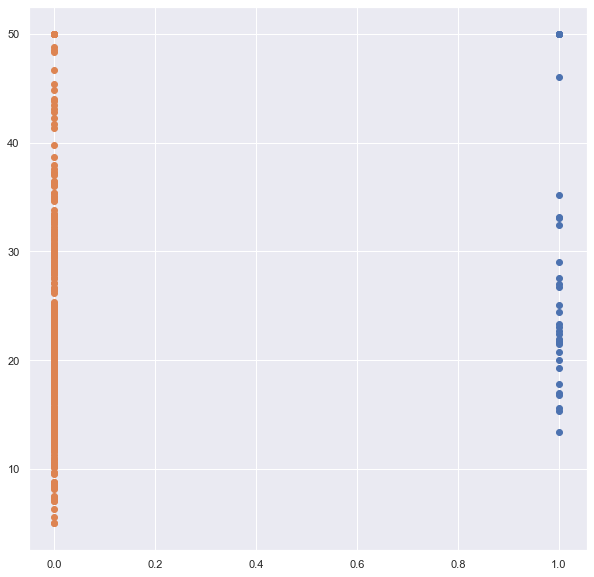

In [22]:
#Splitting the dataset between houses that face the river and those that don't


b = bostondf[bostondf ['CHAS']==1]['MEDV']
h = bostondf[bostondf ['CHAS']==1]['CHAS']

d = bostondf[bostondf ['CHAS']==0]['MEDV']
i = bostondf[bostondf ['CHAS']==0]['CHAS']


#scatter plot with values divided: Houses in the River in blue , houses not in the river in orange
plt.figure(figsize = (10,10))
plt.scatter(h,b)
plt.scatter(i,d)






In [23]:
#houses facing the river mean
b.mean()

28.44

In [24]:
#houses not facing the river mean
d.mean()

22.093842887473482

The following boxplot shows in a graphical way the price difference between houses on the River bound and houses not in the River bound.

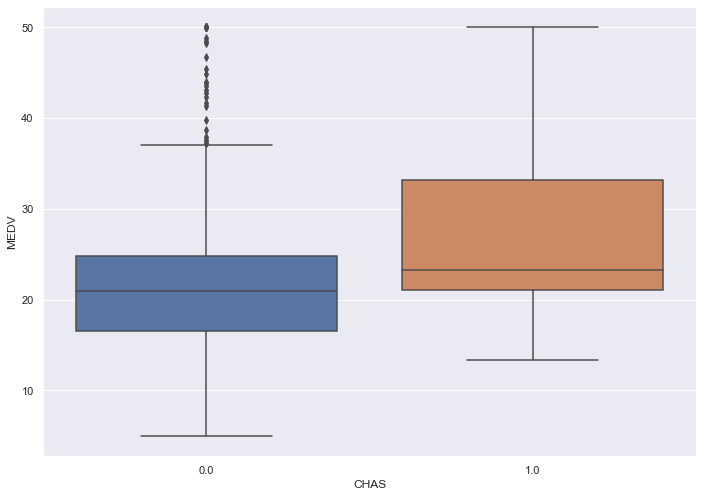

In [25]:
#representing river and no river values in the boxplot
sns.boxplot(x='CHAS', y='MEDV', data=bostondf)


As per the data displayed above regarding the mean and the quartiles represented in the box plots, the houses facing the river would most likely have a higher price than the houses not facing the river.

### Infer Appendix 1
------------------------------------------------------------------
#### Previous attempts to Infer the data set

This part of the assessment has been proved to be challenging due to the complexity of choosing the approach that fits the data we are trying to analyse. 

After analysing different methods like Anova and trying different approaches, the one that has been more beneficial has been the t-test approach.

Some confusion has arisen from the description of the two-sample t-test as it takes the following characteristics to be able to be applied:

"- The sampling method for each sample is simple random sampling.
- The samples are independent.
- Each population is at least 20 times larger than its respective sample.
- The sampling distribution is approximately normal, which is generally the case if any of the following conditions apply.
    - The population distribution is normal.
    - The population data are symmetric, unimodal, without outliers, and the sample size is 15 or less.
    - The population data are slightly skewed, unimodal, without outliers, and the sample size is 16 to 40.
    - The sample size is greater than 40, without outliers."https://stattrek.com/hypothesis-test/difference-in-means.aspx
    
    
Analyzing the CHAS variable all together it didn't seem to follow a normal distribution. Nevertheless dividing the data set in houses bounding the river and houses not bounding the river, the first ones follow approximately a normal distribution. The houses that don't face the river follow a different distribution, it can seem normal distribution to a point but has a high outlier in MEDV 50.

Below we can see the attempts to run a linear regression on the data.

***Regression and fittig a line***

Regression tries to find the equation for the corresponding line that the data fits in. 

Regression and correlation analysis are statistical techniques to examine causal relationships between variables. Regression and correlation measure the degree of relationship between two or more variables in two different but related ways. In regression analysis, a single dependent variable, Y, is considered to be a function of one or more independent variables.



*Source: http://www.physicalgeography.net/fundamentals/3h.html

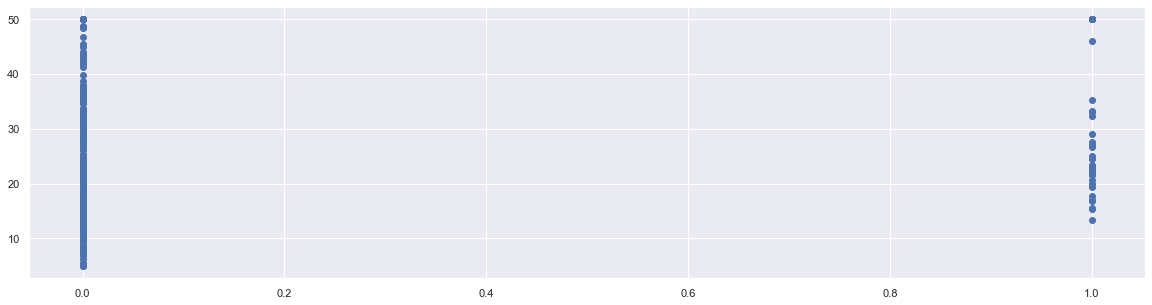

In [26]:
# Plot river versus price
River = bostondf['CHAS']

plt.figure(figsize=(20, 5))

plt.scatter(River,price)


**Attempt to run linear regression on the CHAS and MEDV variables**

In [27]:
# Do regression on the river and price arrays using numpy.
np.polyfit(River, price, 1)

array([ 6.34615711, 22.09384289])

In [28]:
m, c = np.polyfit(River, price, 1)
# Have a look at m and c.
m, c

(6.346157112526541, 22.093842887473453)

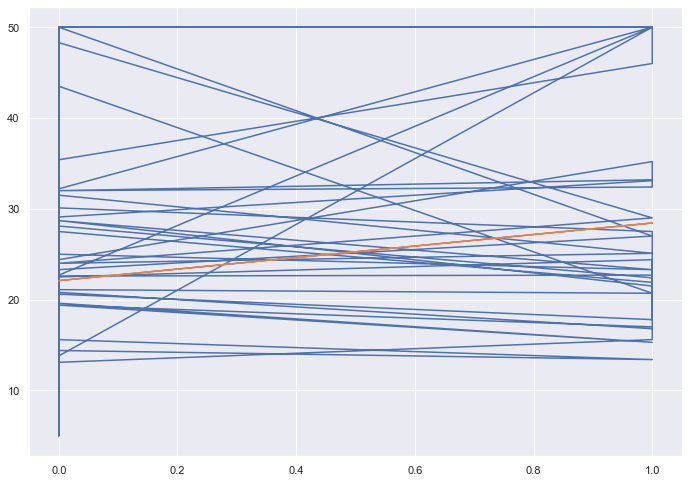

In [29]:
# Plot river and price and the regression line in red.
plt.plot(River, price)
plt.plot(River, m * River + c)



The attempt to run linear regression is not satisfactory as the data doesn't seem to follow a linear correlation.


**Attempt to run linear regression with the categorical variable CHAS split**

In [30]:
m, c = np.polyfit(RiverYES, PriceRivYES, 1)
# Have a look at m and c.
m, c

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


(14.219999999999999, 14.220000000000006)

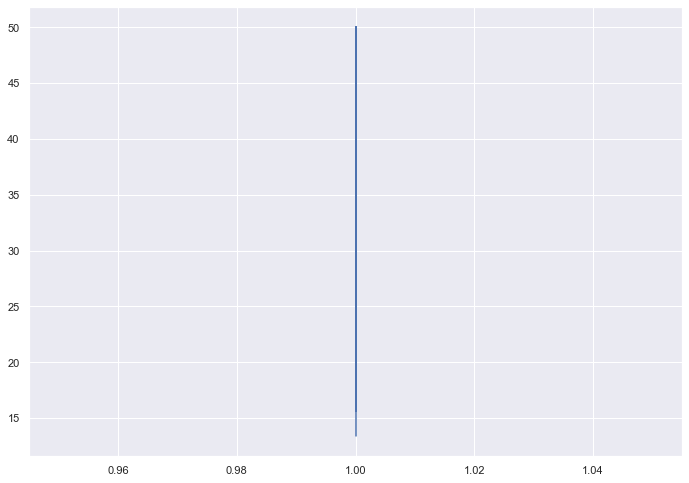

In [31]:
# Plot river and price and the regression line in red.
plt.plot(RiverYES, PriceRivYES)
plt.plot(RiverYES, m * RiverYES + c)

Another attempt to run linear regression with the categorical value of CHAS divided into 0 and 1 has been proved to not work either as the River variable is always 1 or always 0, so those variables don't correlate in this case with a linear function.

Linear regression doesn't seem to be a good fit for the CHAS variable as the line just goes vertically with giving any specific information about the data relationships.

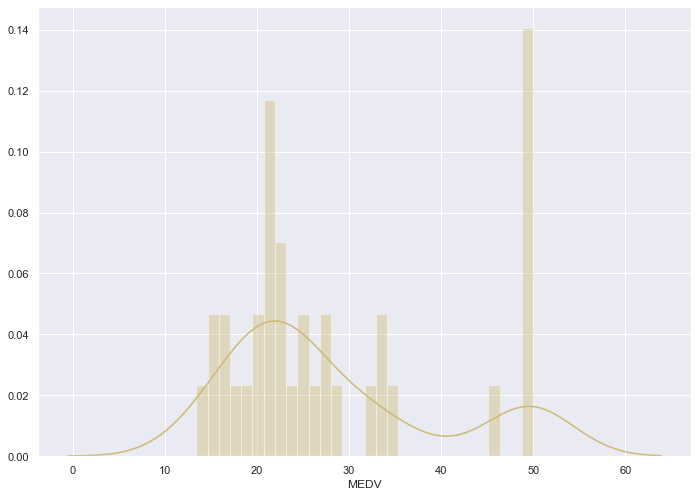

In [32]:
#Getting the info of the houses that face the river
RiverYES = bostondf[bostondf['CHAS']==1]['MEDV']


# Using pyplot to plot the distribution of the houses facing the river

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(RiverYES, color="y", bins=30)
plt.show()

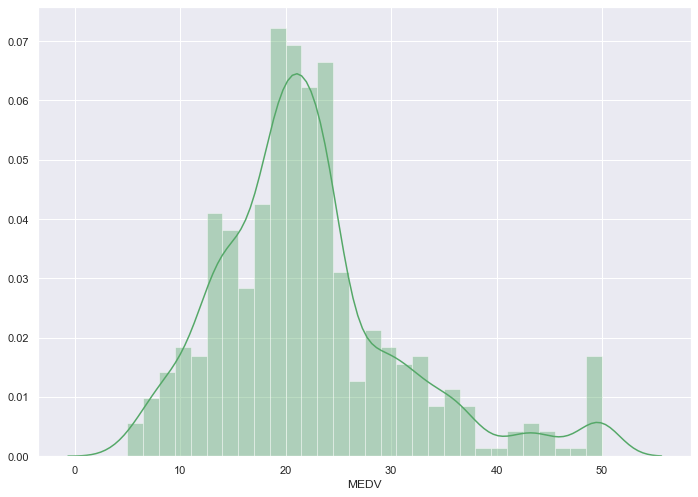

In [33]:
#Getting the info of the houses that face the river
RiverNO = bostondf[bostondf['CHAS']==0]['MEDV']


# Using pyplot to plot the distribution of the houses facing the river

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(RiverNO, color="g", bins=30)
plt.show()

The plots above show that the MEDV (Price) variable follows a normal distribution, while the second plot shows that the CHAS (houses in the river border) doesn't follow a normal distribution.

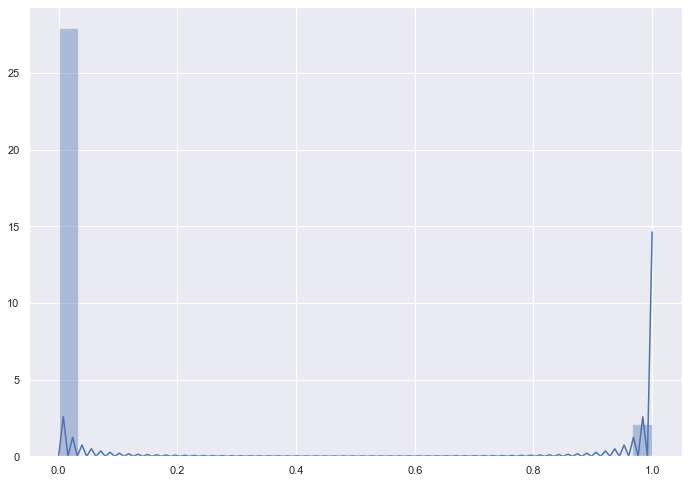

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bostondf.iloc[:,3:4], bins=30)
plt.show()

## 3. Predict

## What are neural networks?


Neural networks are a set of algorithms, modelled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labelling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.

Neural networks help us cluster and classify. They help to group unlabeled data according to similarities among the example inputs, and they classify data when they have a labelled dataset to train on. 

Neural networks can also extract features that are fed to other algorithms for clustering and classification; so you can think of deep neural networks as components of larger machine-learning applications involving algorithms for reinforcement learning, classification and regression.

References:
https://skymind.ai/wiki/neural-network

## Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation.

It is written in Python and supports multiple back-end neural network computation engines.

Keras was created to be user-friendly, modular, easy to extend and to work with Python. The API was “designed for human beings, not machines,”.

Neural layers, cost functions, optimizers, initialization schemes, activation functions, and regularization schemes are all standalone modules that can be combined to create new models. Models are defined in Python code, not separate model configuration files.


References: 
https://keras.io/
https://www.infoworld.com/article/3336192/what-is-keras-the-deep-neural-network-api-explained.html

## Training a neural network

### Difference between epoch and Batch
**Epoch**
One cycle through the entire training dataset is called a training epoch.

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

**Batch**
The batch size is a number of samples processed before the model is updated.

The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

*Source: 

https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

### Activation methods


### Optimizers:

**Gradient descent** is an optimization algorithm often used for finding the weights or coefficients of machine learning algorithms, such as artificial neural networks and logistic regression.

It works by having the model make predictions on training data and using the error on the predictions to update the model in such a way as to reduce the error.

Gradient descent can vary in terms of the number of training patterns used to calculate error; that is in turn used to update the model.

The number of patterns used to calculate the error includes how stable the gradient is that is used to update the model. We will see that there is a tension in gradient descent configurations of computational efficiency and the fidelity of the error gradient.

The three main flavours of gradient descent are batch, stochastic, and mini-batch.

**Stochastic gradient descent**, often abbreviated SGD, is a variation of the gradient descent algorithm that calculates the error and updates the model for each example in the training dataset.

**Batch gradient descent** is a variation of the gradient descent algorithm that calculates the error for each example in the training dataset, but only updates the model after all training examples have been evaluated.

**Mini-batch gradient descent** is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.

Implementations may choose to sum the gradient over the mini-batch which further reduces the variance of the gradient.

Mini-batch gradient descent seeks to find a balance between the robustness of stochastic gradient descent and the efficiency of batch gradient descent. It is the most common implementation of gradient descent used in the field of deep learning.

**Adam** is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

Adam combines the advantages of two other extensions of stochastic gradient descent. Specifically:

- Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).

- Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance).

Adam is a popular algorithm in the field of deep learning because it achieves good results fast.


*Sources:
https://towardsdatascience.com/the-3-best-optimization-methods-in-neural-networks-40879c887873

https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

## Building the model

In [38]:
#building the model

inputs = bostondf[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT', 'CHAS']]
output = bostondf['MEDV']


m = kr.models.Sequential()

m.add(kr.layers.Dense(100, input_dim=13, activation="sigmoid"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(1, activation="relu"))

m.compile(loss="mean_squared_error", optimizer="adam")



### Split

In [41]:
# Split the inputs and outputs into training and test sets.
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, output, test_size=0.2)

In [42]:
#getting a summary of the inputs_test
inputs_test.iloc[0]

CRIM         0.52058
ZN           0.00000
INDUS        6.20000
NOX          0.50700
RM           6.63100
AGE         76.50000
DIS          4.14800
RAD          8.00000
TAX        307.00000
PTRATIO     17.40000
B          388.45000
LSTAT        9.54000
CHAS         1.00000
Name: 236, dtype: float64

### Train

In [43]:
# Train the neural network.
m.fit(inputs, output, epochs=600, batch_size=200)

Epoch 1/600
506/506 [==============================] - 0s 708us/step - loss: 579.4424
Epoch 2/600
506/506 [==============================] - 0s 40us/step - loss: 534.0517
Epoch 3/600
506/506 [==============================] - 0s 38us/step - loss: 450.7722
Epoch 4/600
506/506 [==============================] - 0s 34us/step - loss: 314.0762
Epoch 5/600
506/506 [==============================] - 0s 44us/step - loss: 148.2291
Epoch 6/600
506/506 [==============================] - 0s 47us/step - loss: 108.1237
Epoch 7/600
506/506 [==============================] - 0s 37us/step - loss: 143.6727
Epoch 8/600
506/506 [==============================] - 0s 41us/step - loss: 82.7331
Epoch 9/600
506/506 [==============================] - 0s 49us/step - loss: 83.7855
Epoch 10/600
506/506 [==============================] - 0s 38us/step - loss: 95.9128
Epoch 11/600
506/506 [==============================] - 0s 46us/step - loss: 85.6305
Epoch 12/600
506/506 [==============================] - 0s 33us/st

506/506 [==============================] - 0s 40us/step - loss: 10.5075
Epoch 193/600
506/506 [==============================] - 0s 37us/step - loss: 10.2999
Epoch 194/600
506/506 [==============================] - 0s 34us/step - loss: 10.1596
Epoch 195/600
506/506 [==============================] - 0s 41us/step - loss: 10.5419
Epoch 196/600
506/506 [==============================] - 0s 37us/step - loss: 10.2388
Epoch 197/600
506/506 [==============================] - 0s 38us/step - loss: 10.5431
Epoch 198/600
506/506 [==============================] - 0s 40us/step - loss: 10.0031
Epoch 199/600
506/506 [==============================] - 0s 42us/step - loss: 10.3883
Epoch 200/600
506/506 [==============================] - 0s 34us/step - loss: 9.9241
Epoch 201/600
506/506 [==============================] - 0s 60us/step - loss: 10.0287
Epoch 202/600
506/506 [==============================] - 0s 36us/step - loss: 10.1403
Epoch 203/600
506/506 [==============================] - 0s 38us/step

506/506 [==============================] - 0s 44us/step - loss: 6.1342
Epoch 385/600
506/506 [==============================] - 0s 35us/step - loss: 6.4295
Epoch 386/600
506/506 [==============================] - 0s 39us/step - loss: 6.0475
Epoch 387/600
506/506 [==============================] - 0s 58us/step - loss: 6.3923
Epoch 388/600
506/506 [==============================] - 0s 46us/step - loss: 5.8932
Epoch 389/600
506/506 [==============================] - 0s 45us/step - loss: 5.8767
Epoch 390/600
506/506 [==============================] - 0s 38us/step - loss: 5.7407
Epoch 391/600
506/506 [==============================] - 0s 38us/step - loss: 5.8516
Epoch 392/600
506/506 [==============================] - 0s 40us/step - loss: 5.9253
Epoch 393/600
506/506 [==============================] - 0s 44us/step - loss: 6.2301
Epoch 394/600
506/506 [==============================] - 0s 36us/step - loss: 5.9725
Epoch 395/600
506/506 [==============================] - 0s 36us/step - loss: 5

506/506 [==============================] - 0s 72us/step - loss: 4.5764
Epoch 577/600
506/506 [==============================] - 0s 43us/step - loss: 5.0283
Epoch 578/600
506/506 [==============================] - 0s 36us/step - loss: 4.4595
Epoch 579/600
506/506 [==============================] - 0s 47us/step - loss: 4.6911
Epoch 580/600
506/506 [==============================] - 0s 35us/step - loss: 4.1451
Epoch 581/600
506/506 [==============================] - 0s 53us/step - loss: 4.3718
Epoch 582/600
506/506 [==============================] - 0s 39us/step - loss: 4.3462
Epoch 583/600
506/506 [==============================] - 0s 42us/step - loss: 4.7601
Epoch 584/600
506/506 [==============================] - 0s 47us/step - loss: 4.2732
Epoch 585/600
506/506 [==============================] - 0s 34us/step - loss: 4.2445
Epoch 586/600
506/506 [==============================] - 0s 47us/step - loss: 4.4922
Epoch 587/600
506/506 [==============================] - 0s 43us/step - loss: 4

### Predict

In [44]:
#https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-and-iris.ipynb
m.predict(inputs_test.as_matrix()[0:1])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[27.197168]], dtype=float32)

In [45]:
# Have the network predict the prices of the houses test inputs.
predictions_test = m.predict(inputs_test)
predictions_test

array([[27.197168],
       [27.274736],
       [47.05928 ],
       [21.989372],
       [18.612207],
       [25.522362],
       [12.191228],
       [27.547852],
       [11.926952],
       [24.958735],
       [23.228   ],
       [19.700417],
       [19.788853],
       [24.217165],
       [16.780819],
       [35.04691 ],
       [12.740442],
       [35.710575],
       [23.470663],
       [36.849155],
       [22.418198],
       [12.948249],
       [21.633451],
       [10.55502 ],
       [48.398132],
       [38.08823 ],
       [29.97115 ],
       [39.6601  ],
       [28.430649],
       [20.80226 ],
       [16.013731],
       [31.292425],
       [22.441298],
       [26.14792 ],
       [14.674414],
       [22.005796],
       [20.367579],
       [21.631336],
       [22.689863],
       [26.533804],
       [22.614058],
       [50.70643 ],
       [24.5103  ],
       [33.782387],
       [19.76815 ],
       [34.965534],
       [20.01115 ],
       [18.083757],
       [21.088085],
       [22.695555],


### Evaluation

In [46]:
#Converting the ouputs test into an array
outputs_test.as_matrix()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([25.1, 22.8, 50. , 19.4, 18.4, 24. , 11.3, 27.5, 10.2, 21. , 20.2,
       18.9, 20. , 25. , 14.5, 32.4, 12.8, 28.7, 21.7, 37.3, 21.7, 11.9,
       19.4, 10.4, 50. , 33.4, 27.9, 37.9, 25. , 11.9, 15.6, 23.7, 23.8,
       28. , 13.5, 19.3, 19.1, 20.3, 23.9, 23.7, 22.2, 50. , 24.7, 30.1,
       21.5, 31.1, 20.4, 17.3, 21.4, 22.8, 26.6, 23.1,  7.4, 19. , 22.9,
       14.1, 17.9, 11.7,  8.1, 18.4, 21.8, 30.5, 18.8, 20.8, 21.9,  7.2,
       50. , 17.5, 50. , 10.9, 24.8, 13.8, 22.6, 16.6, 20.3, 21.5, 32.2,
       16. , 19.5, 16.6, 43.1, 18.2, 24.1, 17.4, 16.8, 28.4, 16.5, 22.6,
       23.3, 44. , 22.6, 13.4, 50. , 50. , 21.2, 38.7,  8.4, 20.5, 23. ,
       23.9, 46.7, 31. ])

In [47]:
#difference between the outputs prediction and the test outputs
m.predict(inputs_test).T - outputs_test.as_matrix()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[ 2.09716835,  4.4747364 , -2.9407196 ,  2.58937225,  0.21220741,
         1.52236176,  0.89122791,  0.04785156,  1.72695236,  3.95873451,
         3.02800064,  0.80041656, -0.21114731, -0.78283501,  2.28081894,
         2.64690933, -0.05955772,  7.0105751 ,  1.77066307, -0.45084457,
         0.71819763,  1.04824886,  2.23345146,  0.15502033, -1.60186768,
         4.68823013,  2.07114944,  1.76009903,  3.4306488 ,  8.90225945,
         0.413731  ,  7.59242516, -1.35870247, -1.85207939,  1.17441368,
         2.70579643,  1.26757851,  1.33133621, -1.2101368 ,  2.83380394,
         0.41405754,  0.70642853, -0.18970032,  3.68238678, -1.73184967,
         3.86553421, -0.38884964,  0.7837574 , -0.31191483, -0.10444527,
         0.31914368, -0.07239494,  2.21721802,  2.24333954,  1.72771606,
        -0.17913494, -6.71433296,  3.38236122,  1.79647388, -0.50922813,
         1.59197922,  5.63293839, -0.30826454,  1.4641716 ,  2.04393539,
         3.62243156, -1.63012695,  3.15135765,  4.3

In [48]:
#difference between 2 arrays to calculate the mean squared error
np.sqrt(np.sum(m.predict(inputs_test).T - outputs_test.as_matrix())**2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


162.9523731231689

## Preprocessing the data

### Standarization of the data

Standardization process means that each variable is looked individually. 

Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance.

The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next, the mean is subtracted from each feature. Then the values are divided (mean is already subtracted) of each feature by its standard deviation.

Standardization assumes that the data in the data set has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if the attribute distribution is Gaussian.

*source: https://machinelearningmastery.com/normalize-standardize-machine-learning-data-weka/

https://en.wikipedia.org/wiki/Feature_scaling#Standardization_(Z-score_Normalization)

In [49]:
#pre-procesing by standarizing

inputs_st = bostondf[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT', 'CHAS']]
output_st = bostondf['MEDV']

#scaler
scaler = pre.StandardScaler()
scaler.fit(inputs_st)
scaler.mean_, scaler.scale_
st_scale_in = pd.DataFrame(scaler.transform(inputs_st), columns=inputs_st.columns)



# Split the inputs and outputs into training and test sets.
inputs_train_st, inputs_test_st, outputs_train_st, outputs_test_st = mod.train_test_split(st_scale_in, output_st, test_size=0.2)


#neural network

m = kr.models.Sequential()

m.add(kr.layers.Dense(100, input_dim=13, activation="linear"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

m.fit(st_scale_in, output, epochs=400, batch_size=64)

Epoch 1/400
506/506 [==============================] - 0s 770us/step - loss: 567.0561
Epoch 2/400
506/506 [==============================] - 0s 52us/step - loss: 477.4735
Epoch 3/400
506/506 [==============================] - 0s 57us/step - loss: 295.8888
Epoch 4/400
506/506 [==============================] - 0s 47us/step - loss: 115.5209
Epoch 5/400
506/506 [==============================] - 0s 45us/step - loss: 72.6407
Epoch 6/400
506/506 [==============================] - 0s 50us/step - loss: 35.0229
Epoch 7/400
506/506 [==============================] - 0s 59us/step - loss: 28.9030
Epoch 8/400
506/506 [==============================] - 0s 63us/step - loss: 25.0892
Epoch 9/400
506/506 [==============================] - 0s 76us/step - loss: 21.1904
Epoch 10/400
506/506 [==============================] - 0s 70us/step - loss: 19.3680
Epoch 11/400
506/506 [==============================] - 0s 62us/step - loss: 17.3775
Epoch 12/400
506/506 [==============================] - 0s 53us/step 

Epoch 98/400
506/506 [==============================] - 0s 49us/step - loss: 3.8475
Epoch 99/400
506/506 [==============================] - 0s 57us/step - loss: 3.7481
Epoch 100/400
506/506 [==============================] - 0s 59us/step - loss: 3.5807
Epoch 101/400
506/506 [==============================] - ETA: 0s - loss: 3.373 - 0s 57us/step - loss: 3.3241
Epoch 102/400
506/506 [==============================] - 0s 52us/step - loss: 3.3684
Epoch 103/400
506/506 [==============================] - 0s 50us/step - loss: 3.1859
Epoch 104/400
506/506 [==============================] - 0s 51us/step - loss: 3.1687
Epoch 105/400
506/506 [==============================] - 0s 53us/step - loss: 3.0778
Epoch 106/400
506/506 [==============================] - 0s 65us/step - loss: 3.1173
Epoch 107/400
506/506 [==============================] - 0s 63us/step - loss: 2.9144
Epoch 108/400
506/506 [==============================] - 0s 58us/step - loss: 2.8805
Epoch 109/400
506/506 [====================

506/506 [==============================] - 0s 58us/step - loss: 1.3513
Epoch 195/400
506/506 [==============================] - 0s 53us/step - loss: 1.2994
Epoch 196/400
506/506 [==============================] - 0s 48us/step - loss: 1.2030
Epoch 197/400
506/506 [==============================] - 0s 51us/step - loss: 1.1770
Epoch 198/400
506/506 [==============================] - 0s 63us/step - loss: 1.0879
Epoch 199/400
506/506 [==============================] - 0s 48us/step - loss: 1.0637
Epoch 200/400
506/506 [==============================] - 0s 59us/step - loss: 1.0745
Epoch 201/400
506/506 [==============================] - 0s 51us/step - loss: 1.0847
Epoch 202/400
506/506 [==============================] - 0s 53us/step - loss: 1.0748
Epoch 203/400
506/506 [==============================] - 0s 53us/step - loss: 0.9868
Epoch 204/400
506/506 [==============================] - 0s 54us/step - loss: 1.1039
Epoch 205/400
506/506 [==============================] - 0s 56us/step - loss: 1

506/506 [==============================] - 0s 46us/step - loss: 0.4557
Epoch 387/400
506/506 [==============================] - 0s 57us/step - loss: 0.4153
Epoch 388/400
506/506 [==============================] - 0s 77us/step - loss: 0.3804
Epoch 389/400
506/506 [==============================] - 0s 50us/step - loss: 0.3629
Epoch 390/400
506/506 [==============================] - 0s 55us/step - loss: 0.4141
Epoch 391/400
506/506 [==============================] - 0s 52us/step - loss: 0.3679
Epoch 392/400
506/506 [==============================] - 0s 61us/step - loss: 0.4052
Epoch 393/400
506/506 [==============================] - 0s 52us/step - loss: 0.3921
Epoch 394/400
506/506 [==============================] - 0s 60us/step - loss: 0.3240
Epoch 395/400
506/506 [==============================] - 0s 60us/step - loss: 0.3212
Epoch 396/400
506/506 [==============================] - 0s 63us/step - loss: 0.3830
Epoch 397/400
506/506 [==============================] - 0s 73us/step - loss: 0

In [50]:
# Have the network predict the prices of the houses test inputs standarized.
predictions_test_st = m.predict(inputs_test_st)
predictions_test_st


array([[21.670815],
       [19.281944],
       [23.155275],
       [ 5.28556 ],
       [50.48227 ],
       [19.557713],
       [17.201237],
       [13.509273],
       [18.595175],
       [35.52978 ],
       [20.642365],
       [22.907986],
       [16.93774 ],
       [30.71239 ],
       [17.725124],
       [49.983868],
       [17.93098 ],
       [36.51245 ],
       [26.932732],
       [20.200836],
       [19.24583 ],
       [21.050488],
       [28.21809 ],
       [20.178888],
       [27.061111],
       [25.347918],
       [23.48143 ],
       [23.056131],
       [14.301897],
       [44.388058],
       [35.13103 ],
       [43.650917],
       [20.306551],
       [15.205727],
       [21.725769],
       [22.294476],
       [21.368156],
       [10.963378],
       [21.74065 ],
       [19.903706],
       [24.479254],
       [15.108036],
       [10.333694],
       [14.082395],
       [30.097506],
       [20.666325],
       [24.025372],
       [23.650774],
       [49.748795],
       [21.408577],


In [51]:
#difference between 2 arrays to calculate the mean squared error
np.sqrt(np.sum(m.predict(inputs_test_st).T - outputs_test_st.as_matrix())**2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


1.1340058326721252

In [52]:
m.predict(inputs_test_st).T - outputs_test_st.as_matrix()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 0.47081451, -0.31805573,  0.05527534,  0.28556013,  0.48226929,
         0.25771255, -0.29876328,  0.00927258, -0.10482521, -1.47021866,
        -0.1576355 ,  0.30798569, -0.86225967,  0.0123909 , -0.07487564,
        -0.01613235,  0.13098068,  0.11245117, -0.16726837, -0.09916382,
        -0.25416946, -0.04951248,  0.01809006,  0.37888832,  0.46111145,
         0.14791756, -0.51856995,  0.35613136, -0.19810295,  0.58805771,
         0.23103104,  0.15091705, -0.29344902,  0.70572662, -0.27423096,
        -0.90552444, -0.03184357,  0.46337795, -0.15934982, -0.0962944 ,
         0.17925377, -0.09196396,  0.63369446, -0.1176054 , -0.20249443,
         0.06632462, -0.27462845, -0.149226  , -0.25120544,  0.50857697,
        -0.44927979, -0.36268997, -0.19173279,  0.92596455,  0.12384567,
         0.07721519,  0.17782021,  0.10892334,  0.53943558,  0.07837944,
         0.14554329,  0.2318409 ,  2.02166176,  0.11451626, -0.07782707,
         0.10832863,  0.16989899, -0.18649483, -0.4

### Whitening

When whitening the data, the data will be looked attending to the correlations between variables. 

A whitening transformation or sphering transformation is a linear transformation that transforms a vector of random variables with a known covariance matrix into a set of new variables whose covariance is the identity matrix, meaning that they are uncorrelated and each have variance 1.

The transformation is called "whitening" because it changes the input vector into a white noise vector.

*Source: 
https://en.wikipedia.org/wiki/Whitening_transformation


In [53]:
#whitening the dataset

inputs_w = bostondf[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT', 'CHAS']]
output_w = bostondf['MEDV']


pca = dec.PCA(n_components=13, whiten=True)
pca.fit(inputs_w)
white = pd.DataFrame(pca.transform(inputs_w), columns=inputs_w.columns)

# Split the inputs and outputs into training and test sets.
inputs_train_w, inputs_test_w, outputs_train_w, outputs_test_w = mod.train_test_split(white, output_w, test_size=0.2)


#neural network

m = kr.models.Sequential()

m.add(kr.layers.Dense(100, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(1, activation="relu"))

m.compile(loss="mean_squared_error", optimizer="adam")

m.fit(white, output, epochs=400, batch_size=64)

Epoch 1/400
506/506 [==============================] - 0s 639us/step - loss: 564.8570
Epoch 2/400
506/506 [==============================] - 0s 57us/step - loss: 463.8161
Epoch 3/400
506/506 [==============================] - 0s 57us/step - loss: 267.8609
Epoch 4/400
506/506 [==============================] - 0s 53us/step - loss: 105.1239
Epoch 5/400
506/506 [==============================] - 0s 50us/step - loss: 84.6819
Epoch 6/400
506/506 [==============================] - 0s 45us/step - loss: 46.9918
Epoch 7/400
506/506 [==============================] - 0s 53us/step - loss: 33.4088
Epoch 8/400
506/506 [==============================] - 0s 61us/step - loss: 27.7926
Epoch 9/400
506/506 [==============================] - 0s 62us/step - loss: 24.4868
Epoch 10/400
506/506 [==============================] - 0s 77us/step - loss: 22.3855
Epoch 11/400
506/506 [==============================] - 0s 60us/step - loss: 21.0126
Epoch 12/400
506/506 [==============================] - 0s 62us/step 

506/506 [==============================] - 0s 49us/step - loss: 0.3233
Epoch 195/400
506/506 [==============================] - 0s 69us/step - loss: 0.3301
Epoch 196/400
506/506 [==============================] - 0s 51us/step - loss: 0.3652
Epoch 197/400
506/506 [==============================] - 0s 61us/step - loss: 0.3952
Epoch 198/400
506/506 [==============================] - 0s 58us/step - loss: 0.4206
Epoch 199/400
506/506 [==============================] - 0s 52us/step - loss: 0.3864
Epoch 200/400
506/506 [==============================] - 0s 64us/step - loss: 0.3320
Epoch 201/400
506/506 [==============================] - 0s 52us/step - loss: 0.3200
Epoch 202/400
506/506 [==============================] - 0s 57us/step - loss: 0.3070
Epoch 203/400
506/506 [==============================] - 0s 62us/step - loss: 0.2962
Epoch 204/400
506/506 [==============================] - 0s 57us/step - loss: 0.2891
Epoch 205/400
506/506 [==============================] - 0s 52us/step - loss: 0

506/506 [==============================] - 0s 64us/step - loss: 0.1718
Epoch 387/400
506/506 [==============================] - 0s 58us/step - loss: 0.1957
Epoch 388/400
506/506 [==============================] - 0s 56us/step - loss: 0.1806
Epoch 389/400
506/506 [==============================] - 0s 57us/step - loss: 0.1851
Epoch 390/400
506/506 [==============================] - 0s 63us/step - loss: 0.1618
Epoch 391/400
506/506 [==============================] - 0s 64us/step - loss: 0.1693
Epoch 392/400
506/506 [==============================] - 0s 52us/step - loss: 0.1940
Epoch 393/400
506/506 [==============================] - 0s 71us/step - loss: 0.3011
Epoch 394/400
506/506 [==============================] - 0s 62us/step - loss: 0.2430
Epoch 395/400
506/506 [==============================] - 0s 57us/step - loss: 0.2328
Epoch 396/400
506/506 [==============================] - 0s 67us/step - loss: 0.1884
Epoch 397/400
506/506 [==============================] - 0s 52us/step - loss: 0

In [54]:
white.corr().round()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
CRIM,1.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0
ZN,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
INDUS,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
NOX,-0.0,-0.0,0.0,1.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0
RM,0.0,-0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
AGE,-0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
DIS,-0.0,0.0,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
RAD,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0
TAX,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,0.0,0.0,-0.0
PTRATIO,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,1.0,-0.0,0.0,-0.0


In [55]:
# Have the network predict the prices of the houses test inputs whitened.
predictions_test_w = m.predict(inputs_test_w)
predictions_test_w

array([[31.084017 ],
       [17.134464 ],
       [33.07039  ],
       [24.120825 ],
       [17.390043 ],
       [49.727417 ],
       [28.713078 ],
       [22.849903 ],
       [35.00314  ],
       [22.121222 ],
       [ 8.676163 ],
       [22.218613 ],
       [21.941628 ],
       [19.362906 ],
       [24.496737 ],
       [13.451305 ],
       [14.152564 ],
       [15.968038 ],
       [15.862626 ],
       [22.259613 ],
       [43.702213 ],
       [10.100141 ],
       [36.625404 ],
       [13.406906 ],
       [20.103018 ],
       [21.021944 ],
       [11.749741 ],
       [45.059048 ],
       [14.590496 ],
       [22.084372 ],
       [15.525135 ],
       [20.855854 ],
       [33.428394 ],
       [14.125904 ],
       [13.712266 ],
       [29.956127 ],
       [21.633875 ],
       [14.43896  ],
       [24.566614 ],
       [13.984793 ],
       [16.292507 ],
       [19.943716 ],
       [22.73123  ],
       [27.156647 ],
       [37.598866 ],
       [33.285065 ],
       [ 4.894253 ],
       [17.90

In [56]:
np.sqrt(np.sum(m.predict(inputs_test_w).T - outputs_test_w.as_matrix())**2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


7.079997062683109

In [57]:
m.predict(inputs_test_w).T - outputs_test_w.as_matrix()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[-1.59832001e-02, -6.55357361e-02,  3.70388794e-01,
         3.20824814e-01,  2.90043259e-01, -2.72583008e-01,
        -3.86922455e-01,  4.49903107e-01, -3.96860504e-01,
        -7.87784576e-02, -1.23837280e-01,  1.86126709e-02,
         1.41627502e-01, -1.37094498e-01,  5.96736526e-01,
         5.13053894e-02, -1.47435951e-01,  3.68037605e-01,
         2.62626076e-01, -2.40386963e-01,  9.02213287e-01,
        -2.99859428e-01,  2.25404358e-01,  1.06906128e-01,
        -9.69821930e-02, -1.78055954e-01, -1.50259399e-01,
         1.25904770e+00, -3.09503937e-01,  3.84371567e-01,
         1.25135040e-01,  1.55854034e-01,  1.28394318e-01,
         1.52590408e+00, -2.87734032e-01, -1.43872833e-01,
         4.33874893e-01, -1.61039925e-01,  1.66614151e-01,
        -4.15207291e-01, -4.07492828e-01, -1.56283951e-01,
        -6.87702179e-02,  5.56646729e-01, -1.13449097e-03,
         1.85064697e-01, -1.05747223e-01,  2.01041031e-01,
         2.87525177e-02,  3.62210083e-01, -6.61473083e-0

### Predict Appendix 1
-----------------------------------------------------------------
**Initial attempts to build a suitable model**

The first try of building a neural network is going to be shown below to show the trial and error approach that machine learning may require en some occasions, especially when the pre-processing it is not applied.

The model below doesn't include yet the splitting between the test data and the trained data, but it's included in this assessment to describe the experimental approach.

In this attempt, for the purpose of the first prediction, there is going to be a prediction on the LSTAT % lower status of the population and MEDV Price of the house variables as they are the variables that show a higher correlation, in this case, a negative correlation.

We have started with linear activations, with 5 layers of neurons and 30 epochs.
Let's try to increase the number of neurons per layer, even though we can see a logarithmic tendency in the data that wouldn't fit the linear line. The neural network in a few iterations stops learning and stops reducing the loss.

The following steps describe the attempts to train a neural network:

Let's change a linear for a sigmoid. It gets better and reduces the loss from the last trial. 

Let's change the optimizer to sgd. Not working (nan)

Adding an extra layer, linear. No effect.

Increasing the neurons from 30 to 50 in the sigmoid. No effect

Changing a linear for a tanh. Much worst

Changing the first layer to sigmoid. No difference

Creating an extra sigmoid layer. A little worst

Creating another linear. No changes

Trying softplus. Not much worst, Not much better

Trying selu activation. No improvement.

Changing sotfplus for linear. Better results

Changing the second sigmoid for linear. Somehow better now 28 loss.

Changing epoch to 70. Not much of a difference

Changing batch size to 100. No difference, It can't reduce it more than 28

Interchanges selu and sigmoid and much worst. 70 loss

Leaving first sigmoid and then 5 linears it learns much quicker but after 10-12 iterations it stops learning

Increasing the batch size from 100 to 400 much worst. Ended in 78

Changed to a batch size of 10. It went back to 28

Changed sigmoid by softsign. Same result around 28

Changed sigmoid by elu. Little bit worst, loss around 30

Changed elu neurons to 100. Same result

Changed elu for sigmoid. Same result

Augmented the number of neurons to 100 in each layer. Same result


It can be seen above that many trials are required to train a neural network.
Analysing the different functions that can be applied to the data helped to an extent, while with that approach the neural network didn't get good results. The activations helped to see how the data was trained.

Some of the different optimizers methods didn't work with the data we were trying to train such as Stochastic gradient descent. Extracted from some of the research done, it looked like the data needed to be bigger than the data exposed in the Boston data set or that due to the noisy learning process it didn't work well with the data we are trying to train.

Learning about the batch size and the epoch gives a better understanding about what the neural network is doing.  Even though the activation methods still comprise high complexity.




References: 
https://keras.io/getting-started/sequential-model-guide/

https://keras.io/activations/

https://arxiv.org/abs/1706.02515

https://github.com/bioinf-jku/SNNs/blob/master/SelfNormalizingNetworks_CNN_CIFAR10.ipynb

https://www.analyticsvidhya.com/blog/2017/10/fundamentals-deep-learning-activation-functions-when-to-use-them/

https://ingenieriaelectronica.org/funcion-inversa-funcion-logaritmica-funciones-trigonometricas-inversas/

https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

https://stackoverflow.com/questions/47726549/convolutional-neural-network-with-logarithmic-and-exponential-activation-functio

https://sefiks.com/2017/11/10/softsign-as-a-neural-networks-activation-function/

https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

https://towardsdatascience.com/the-3-best-optimization-methods-in-neural-networks-40879c887873

https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/

https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

https://keras.io/optimizers/

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
506/506 [==============================] - 0s 815us/step - loss: 116.3743
Epoch 2/30
506/506 [==============================] - 0s 254us/step - loss: 34.4132
Epoch 3/30
506/506 [==============================] - 0s 254us/step - loss: 30.9428
Epoch 4/30
506/506 [==============================] - 0s 317us/step - loss: 31.9775
Epoch 5/30
506/506 [==============================] - 0s 338us/step - loss: 29.9448
Epoch 6/30
506/506 [==============================] - 0s 296us/step - loss: 33.3499
Epoch 7/30
506/506 [==============================] - 0s 331us/step - loss: 31.8466
Epoch 8/30
506/506 [==============================] - 0s 299us/step - loss: 31.1639
Epoch 9/30
506/506 [==============================] - 0s 282us/step - loss: 31.6667
Epoch 10/30
506/506 [==============================] - 0s 351us/step - loss: 29.9984
Epoch 11/30
506/506 [=================

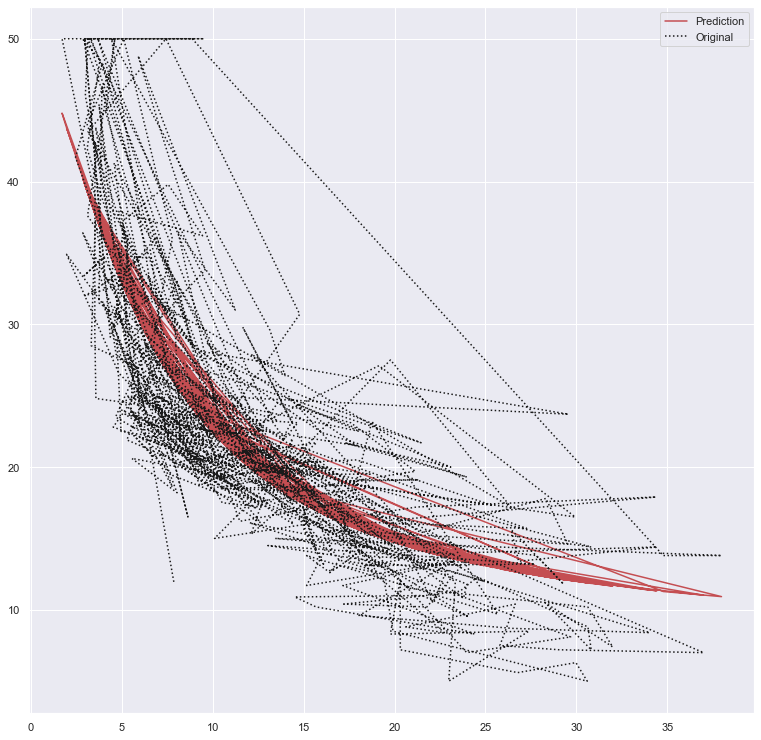

In [35]:
x = bostondf['LSTAT'] 
y = bostondf['MEDV']

#y = y_l
#y = y_p
#y = y_s

# Create a new neural network.
m = kr.models.Sequential()

# Add neurons.
#m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

# Add neurons
m.add(kr.layers.Dense(100, input_dim=1, activation="sigmoid"))
m.add(kr.layers.Dense(100, activation="linear"))
m.add(kr.layers.Dense(100, activation="linear"))
m.add(kr.layers.Dense(100, activation="linear"))
m.add(kr.layers.Dense(100, activation="linear"))
m.add(kr.layers.Dense(1, activation='linear'))

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

# Train the model.
m.fit(x, y, epochs=30, batch_size=10)

# Run each x value through the neural network.
p = m.predict(x)

# Plot the values.
plt.figure(figsize = (13,13))
plt.plot(x, p, 'r-', label='Prediction')
plt.plot(x, y, 'k:', label='Original')
plt.legend()

For the purpose of this second prediction, we tried with a linear prediction to see if we can get a better output. There is going to be a prediction on the RM Rooms in dwelling and MEDV Price of the house variables as they are the variables that show a high correlation, in this case, a positive correlation that resembles a linear relationship.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
506/506 [==============================] - 0s 549us/step - loss: 504.4127
Epoch 2/15
506/506 [==============================] - 0s 167us/step - loss: 288.3513
Epoch 3/15
506/506 [==============================] - 0s 188us/step - loss: 127.2765
Epoch 4/15
506/506 [==============================] - 0s 170us/step - loss: 65.4488
Epoch 5/15
506/506 [==============================] - 0s 168us/step - loss: 60.1994
Epoch 6/15
506/506 [==============================] - 0s 282us/step - loss: 60.0766
Epoch 7/15
506/506 [==============================] - 0s 251us/step - loss: 60.3003
Epoch 8/15
506/506 [==============================] - 0s 203us/step - loss: 59.9643
Epoch 9/15
506/506 [==============================] - 0s 226us/step - loss: 59.9276
Epoch 10/15
506/506 [==============================] - 0s 193us/step - loss: 59.9224
Epoch 11/15
506/506 [===============

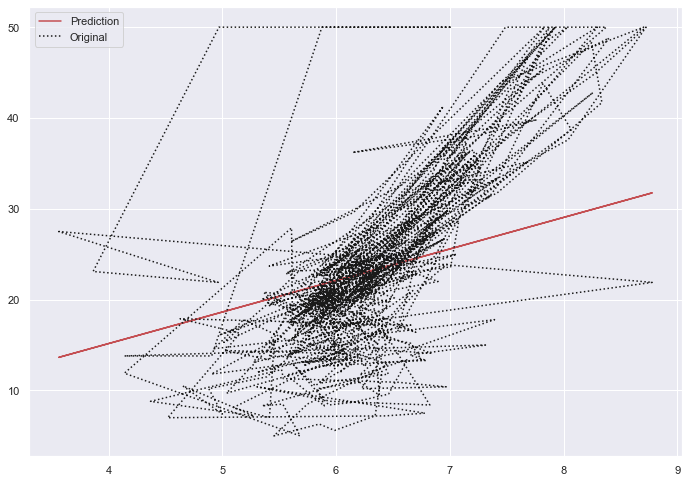

In [36]:
x = bostondf['RM'] 
y = bostondf['MEDV']

#y = y_l
#y = y_p
#y = y_s

# Create a new neural network.
m = kr.models.Sequential()

# Add neurons.
#m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

# Add neurons
m.add(kr.layers.Dense(10, input_dim=1, activation="linear"))
m.add(kr.layers.Dense(10, activation="linear"))
m.add(kr.layers.Dense(1, activation='linear'))

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

# Train the model.
m.fit(x, y, epochs=15, batch_size=10)

# Run each x value through the neural network.
p = m.predict(x)

# Plot the values.
plt.plot(x, p, 'r-', label='Prediction')
plt.plot(x, y, 'k:', label='Original')
plt.legend()

## 4. Conclusion

The techniques of standardization and whitening make a big difference in the use of neural networks and machine learning. 
The efficiency of the neural especially after pre-processing the data with the whitening approach learning has been proved extremely beneficial. 

The results from the prediction with the test data give pretty successful results. The difference between the prediction and the actual result is in most of the cases of 0. or 0.0. 

The mean squared error is quite reduced when the data is standardized and even more reduced when the data in whitened. 


Inferring the data has been proved to be complex due to the intricacy of finding the approach that suited the dataset. 

Predicting the data has been proved to be an excellent art that comprises constant trial and error and continuous learning about the different components such as epochs, batches, optimizers, activation methods and functions and the data set itself. 


## End